<h1 style="text-align:center">decison making </h1> 
</br>
<center>
    <img src="https://www.jsrecruitmentuk.com/wp-content/uploads/decsion.jpg" width="500" alt="cognitiveclass.ai logo"  />
</center>
</br>

## problem description
choice best car with **saw,vikor and topsis** method
## Features on data set
cylinders: contains the number of cylinders present in the car

displacement: contains the Displacement of the car

horsepower: contains the Horsepower of the car

weight: contains the weight of the car

acceleration: contains the Acceleration of the car

model_year: contains the model year of the car

origin: contains the origin country which car belong to

car_name: contains the name of the car(Brand-Model-Variant)
 $$
mpg:            \frac{Miles driven}{gallons  used  to  refill  the  tank}
        $$ 

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#checkDataSet">check data set</a></li>
        <li><a href="#sawmethod">SAW method</a></li>
        <li><a href="#topsis">topsis method</a></li>
        <li><a href="#vikor">vikor method</a></li>
    </ol>
</div>
<br>
<hr>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [5]:
# import module
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

<h2 id="checkDataSet">check data set</h2>

In [6]:
auto_mpg=pd.read_csv(r"auto_mpg_dataset.csv",index_col=7)

In [7]:
auto_mpg.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
car_name,,,,,,,,
chevrolet chevelle malibu,8,307.0,130.0,3504.0,12.0,70,1,18.0
buick skylark 320,8,350.0,165.0,3693.0,11.5,70,1,15.0
plymouth satellite,8,318.0,150.0,3436.0,11.0,70,1,18.0
amc rebel sst,8,304.0,150.0,3433.0,12.0,70,1,16.0
ford torino,8,302.0,140.0,3449.0,10.5,70,1,17.0


In [8]:
auto_mpg.tail()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
car_name,,,,,,,,
ford mustang gl,4,140.0,86.0,2790.0,15.6,82,1,27.0
vw pickup,4,97.0,52.0,2130.0,24.6,82,2,44.0
dodge rampage,4,135.0,84.0,2295.0,11.6,82,1,32.0
ford ranger,4,120.0,79.0,2625.0,18.6,82,1,28.0
chevy s-10,4,119.0,82.0,2720.0,19.4,82,1,31.0


In [9]:
auto_mpg.pop("displacement")
auto_mpg.pop("origin")

car_name
chevrolet chevelle malibu    1
buick skylark 320            1
plymouth satellite           1
amc rebel sst                1
ford torino                  1
                            ..
ford mustang gl              1
vw pickup                    2
dodge rampage                1
ford ranger                  1
chevy s-10                   1
Name: origin, Length: 398, dtype: int64

In [10]:
auto_mpg.head()

,cylinders,horsepower,weight,acceleration,model_year,mpg
car_name,,,,,,
chevrolet chevelle malibu,8,130.0,3504.0,12.0,70,18.0
buick skylark 320,8,165.0,3693.0,11.5,70,15.0
plymouth satellite,8,150.0,3436.0,11.0,70,18.0
amc rebel sst,8,150.0,3433.0,12.0,70,16.0
ford torino,8,140.0,3449.0,10.5,70,17.0


In [11]:
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   horsepower    398 non-null    float64
 2   weight        398 non-null    float64
 3   acceleration  398 non-null    float64
 4   model_year    398 non-null    int64  
 5   mpg           398 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 37.9+ KB


In [12]:
auto_mpg.describe()

,cylinders,horsepower,weight,acceleration,model_year,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,-1404.643216,2970.424623,15.568090,76.010050,23.514573
std,1.701004,12213.424763,846.841774,2.757689,3.697627,7.815984
min,3.000000,-100000.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,75.000000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,92.000000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,125.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


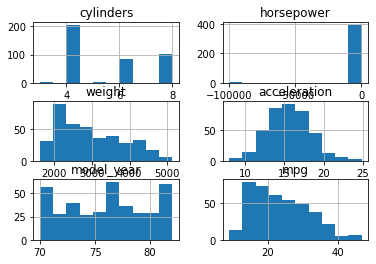

In [13]:
auto_mpg.hist()
plt.show()

In [14]:
auto_mpg.columns

Index(['cylinders', 'horsepower', 'weight', 'acceleration', 'model_year',
       'mpg'],
      dtype='object')

In [15]:
auto_mpg=auto_mpg[auto_mpg['horsepower']>0]

In [16]:
auto_mpg['cylinders'].value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

In [17]:
auto_mpg['horsepower'].value_counts()

150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
         ..
61.0      1
93.0      1
148.0     1
152.0     1
82.0      1
Name: horsepower, Length: 93, dtype: int64

In [18]:
auto_mpg['acceleration'].value_counts()

14.5    23
15.5    21
14.0    16
16.0    16
13.5    15
        ..
11.1     1
12.1     1
21.9     1
22.1     1
11.6     1
Name: acceleration, Length: 95, dtype: int64

In [19]:
auto_mpg["model_year"].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [20]:
mat=np.asanyarray(auto_mpg[['cylinders', 'horsepower', 'weight', 'acceleration', 'model_year','mpg']])
weight=[0.05,0.35,0.05,2,1.5,2]
types=["+","+","-","+","+","+"]

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<h2 id="sawmethod">1.SAW method</h2>

In [21]:
def saw(CriteriaMat,typeOfCriteria,weight):
    m,n=CriteriaMat.shape
    normMat=np.zeros((m,n))
    #normalization
    for i in range(m):
        for j in range(n):
            if typeOfCriteria[j]=="+":
                normMat[i,j]=CriteriaMat[i,j]/np.max(CriteriaMat,axis=0)[j]
            else:
                normMat[i,j]=np.min(CriteriaMat,axis=0)[j]/CriteriaMat[i,j]
    scoreMat=np.zeros((m,n))
    # normal matrix * weight matrix
    for i in range(m):
        for j in range(n):
            scoreMat[i,j]=normMat[i,j] * weight[j]
    finalScore=np.sum(scoreMat,axis=1)
    Rankedmat=np.sort(finalScore)[::-1]
    finalResult=[]
    # rank top 5 
    for i in range(5):
        place=np.where(finalScore==Rankedmat[i])[0][0]
        finalResult.append((auto_mpg.iloc[place].name,Rankedmat[i]))
    return finalResult
    

In [22]:
name=[]
value=[]
for i in saw(mat,types,weight):
    name.append(i[0])
    value.append(i[1])

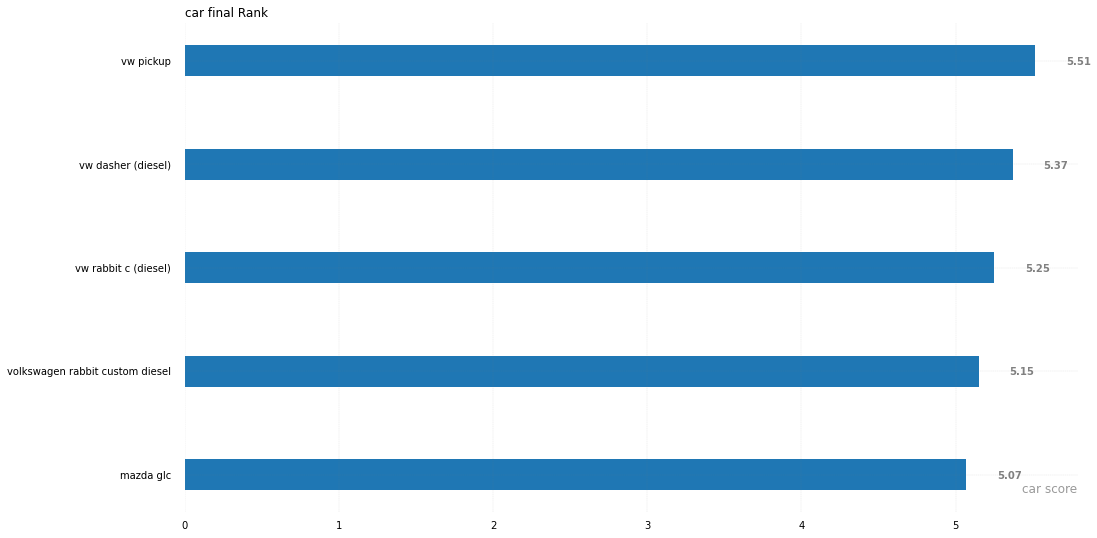

In [23]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(name, value,height=0.3)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.2,
        alpha = 0.5)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.19,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('car final Rank',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'car score', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.8)
 
# Show Plot
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

<h2 id="topsis">2.topsis method</h2>

In [24]:
def topsis(CriteriaMat,typeOfCriteria,weight):
    m,n=CriteriaMat.shape
    normMat=np.zeros((m,n))
    #normalization
    for i in range(m):
        for j in range(n):
            normMat[i,j]=CriteriaMat[i,j]/np.linalg.norm(CriteriaMat[:,j])
    Vmat=np.zeros((m,n))
    #normal matrix * weight matrix
    for i in range(m):
        for j in range(n):
            Vmat[i,j]=normMat[i,j] * weight[j]
    #create Aplus and Amius
    Aplus=np.zeros(n)
    for i in range(n):
        if typeOfCriteria[i]=="+":
            Aplus[i]=np.max(Vmat,axis=0)[i]
        else:
            Aplus[i]=np.min(Vmat,axis=0)[i]
    Aminus=np.zeros(n)
    for i in range(n):
        if typeOfCriteria[i]=="+":
            Aminus[i]=np.min(Vmat,axis=0)[i]
        else:
            Aminus[i]=np.max(Vmat,axis=0)[i]
    #calculate Score matrix
    scoreMat=np.zeros(m)
    for i in range(m):
        Dplus=np.linalg.norm(Aplus-Vmat[i,:])
        Dminus=np.linalg.norm(Aminus-Vmat[i,:])
        scoreMat[i]=Dminus/(Dplus+Dminus)
    #ranke top 5 
    Rankedmat=np.sort(scoreMat)[::-1]
    finalResult=[]
    for i in range(5):
        place=np.where(scoreMat==Rankedmat[i])[0][0]
        finalResult.append((auto_mpg.iloc[place].name,Rankedmat[i]))
    return finalResult

In [25]:
name=[]
value=[]
for i in topsis(mat,types,weight):
    name.append(i[0])
    value.append(i[1])
value

[0.8550607090758738,
 0.8415094382798952,
 0.8229591907702818,
 0.8089070573019886,
 0.7641684681034441]

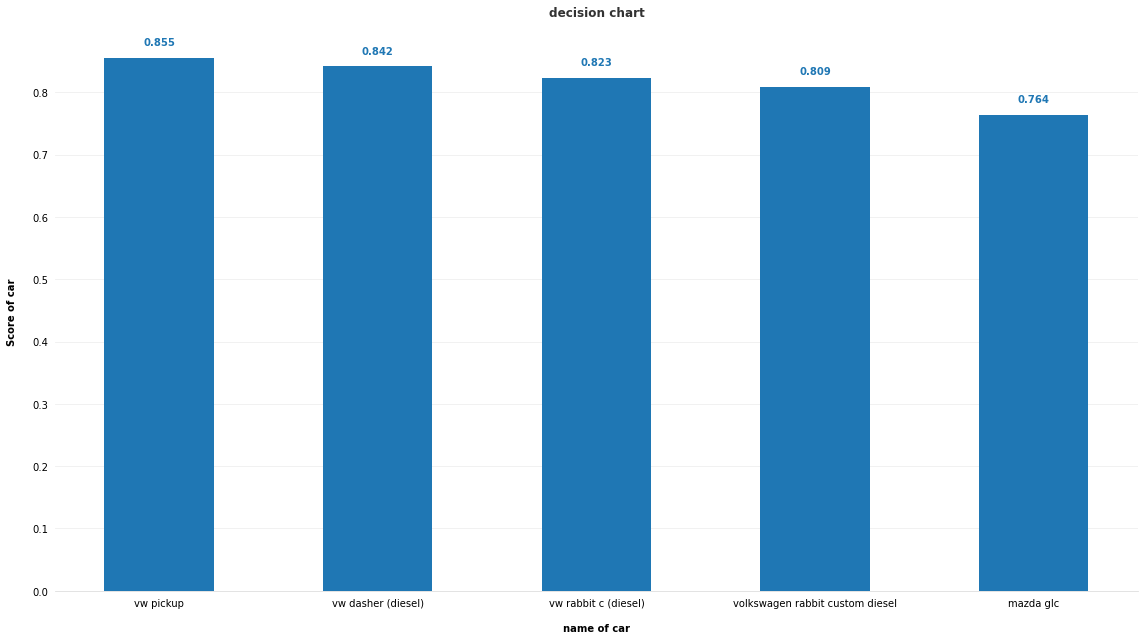

In [26]:
fig, ax = plt.subplots(figsize =(16, 9))

# Save the chart so we can loop through the bars below.
bars = ax.bar(
    name,
    value,
    width=0.5
)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
bar_color = bars[0].get_facecolor()
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height()+0.02 ,
      round(bar.get_height(), 3),
      horizontalalignment='center',
      color=bar_color,
      weight='bold'
  )

# Add labels and a title. Note the use of `labelpad` and `pad` to add some
# extra space between the text and the tick labels.
ax.set_xlabel('name of car', labelpad=15, color="black",weight="bold")
ax.set_ylabel('Score of car', labelpad=15, color='black',weight="bold")
ax.set_title('decision chart', pad=15, color='#333333',
             weight='bold')

fig.tight_layout()


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<h2 id="vikor">3.vikor method</h2>

In [27]:
def vikor(CriteriaMat,typeOfCriteria,weight,Lambda):
    m,n=CriteriaMat.shape
    normMat=np.zeros((m,n))
    newmat=np.zeros((m,n))
    Smat=np.zeros(m)
    Rmat=np.zeros(m)
    Qmat=np.zeros(m)
    for i in range(m):
        for j in range(n):
                newmat[i,j]=(weight[j]*(np.max(CriteriaMat,axis=0)[j]-CriteriaMat[i,j]))/((np.max(CriteriaMat,axis=0)[j]-np.min(CriteriaMat,axis=0)[j]))
    for i in range(m):
        Smat[i]=np.sum(newmat,axis=1)[i]
        Rmat[i]=np.max(newmat,axis=1)[i]
    Splus=np.min(Smat)
    Sminus=np.max(Smat)
    Rplus=np.min(Rmat)
    Rminus=np.max(Rmat)
    for i in range(m):
        Qmat[i]=Lambda*((Smat[i]-Splus)/(Sminus-Splus))+(1-Lambda)*((Rmat[i]-Rplus)/(Rminus-Rplus))
    DQ=1/(1-m)
    combineMat=np.array((Smat,Rmat,Qmat)).transpose()
    RankedMat=np.sort(combineMat,axis=0)
    c2=(combineMat[np.where(combineMat[:,2]==RankedMat[0,2])[0],1]==RankedMat[0,1]) and (combineMat[np.where(combineMat[:,2]==RankedMat[0,2])[0],0]==RankedMat[0,0]) 
    if RankedMat[1,2]-RankedMat[0,2]>=DQ and c2:
        final=[np.where(combineMat[:,2]==RankedMat[0,2])[0]+1]
        return final
    elif not c2 and RankedMat[1,2]-RankedMat[0,2]>=DQ:
        final=[np.where(combineMat[:,2]==RankedMat[0,2])[0]+1 , np.where(combineMat[:,2]==RankedMat[1,2])[0]+1]
        return final
    elif c2 and not (RankedMat[0,2]-RankedMat[1,2]>=DQ):
        for i in range(m+1):
            if(RankedMat[i,2]-RankedMat[0,2]<DQ):
                index=i
                break
        final=[]
        for i in range(index):
            final.append(np.where(combineMat[:,2]==RankedMat[i,2])[0]+1)
        return final


In [28]:
for i in vikor(mat,types,weight,0.5):
    print(auto_mpg.iloc[i[0]].name)

dodge rampage
